In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
plt.style.use('fivethirtyeight')


%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
df = pd.read_csv('fifa_ranking.csv')

In [3]:
df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [18]:
df['rank_date'] = [datetime.strptime(i, '%Y-%M-%d') for i in df.rank_date ]
df['year'] = [i.year for i in df.rank_date ]

In [58]:
country_dict = {}
for country in ['Germany', 'Italy', 'Brazil', 'Ecuador', 'Argentina', 'Uruguay', 'Spain']:
    test = pd.DataFrame(df[df.country_full == country].groupby(['year', 'country_abrv'])['rank'].mean()).reset_index()
    country_dict['year'] = test.year
    country_dict[country] = test['rank']

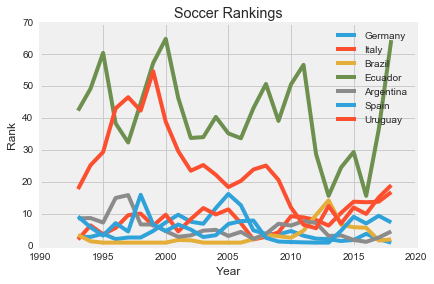

In [68]:
plt.plot(country_dict['year'], country_dict['Germany']  , label = 'Germany' )
plt.plot(country_dict['year'], country_dict['Italy']    , label = 'Italy'   )
plt.plot(country_dict['year'], country_dict['Brazil']   , label = 'Brazil'  )
plt.plot(country_dict['year'], country_dict['Ecuador']  , label = 'Ecuador'  )
plt.plot(country_dict['year'], country_dict['Argentina'], label = 'Argentina')
plt.plot(country_dict['year'], country_dict['Spain']    , label = 'Spain'    )
plt.plot(country_dict['year'], country_dict['Uruguay']  , label = 'Uruguay'  )
plt.xlabel('Year')
plt.ylabel('Rank')
plt.title('Soccer Rankings')
plt.legend()
plt.show()